In [2]:
from algoshort.yfinance_handler import YFinanceDataHandler

# Initialize with custom chunk size
handler = YFinanceDataHandler(cache_dir="./cache")


In [3]:
symbols = ['A2A.MI', 'FTSEMIB.MI']
handler.download_data(symbols, period='5y')


2025-09-10 22:30:16,372 - INFO - Loaded A2A.MI from cache
2025-09-10 22:30:16,375 - INFO - Loaded FTSEMIB.MI from cache
2025-09-10 22:30:16,380 - INFO - Cache hits: 2, Downloads needed: 0


{'A2A.MI': Price           open      high       low     close   volume
 Date                                                       
 2020-09-10  0.974644  0.977753  0.952882  0.958323  9705867
 2020-09-11  0.962209  0.969981  0.956768  0.963763  6708910
 2020-09-14  0.969981  0.969981  0.955602  0.958711  5094421
 2020-09-15  0.961043  0.971147  0.952493  0.968038  6821368
 2020-09-16  0.964152  0.967261  0.954825  0.959877  6329082
 ...              ...       ...       ...       ...      ...
 2025-09-04  2.098000  2.130000  2.096000  2.116000  6425903
 2025-09-05  2.118000  2.134000  2.109000  2.127000  5181825
 2025-09-08  2.128000  2.131000  2.106000  2.106000  5032625
 2025-09-09  2.103000  2.114000  2.102000  2.112000  5528723
 2025-09-10  2.111000  2.117000  2.097000  2.117000  6680848
 
 [1273 rows x 5 columns],
 'FTSEMIB.MI': Price               open          high           low         close     volume
 Date                                                                       

In [4]:
stock_data = handler.calculate_relative_prices(symbol='A2A.MI', benchmark_symbol='FTSEMIB.MI')

In [5]:
from algoshort.regime_bo import RegimeBO

# Initialize Regime class
regime_bo = RegimeBO(ohlc_stock=stock_data)
regime_bo.compute_regime(regime_type='breakout', window=150, relative=True, inplace=True)

Price,date,open,high,low,close,ropen,rhigh,rlow,rclose,rhi_150,rlo_150,rbo_150
0,2020-09-10,0.974644,0.977753,0.952882,0.958323,0.9746,0.9778,0.9529,0.9583,NaN,NaN,NaN
1,2020-09-11,0.962209,0.969981,0.956768,0.963763,0.9622,0.9699,0.9567,0.9637,NaN,NaN,NaN
2,2020-09-14,0.969981,0.969981,0.955602,0.958711,0.9713,0.9713,0.9569,0.9600,NaN,NaN,NaN
3,2020-09-15,0.961043,0.971147,0.952493,0.968038,0.9544,0.9645,0.9460,0.9614,NaN,NaN,NaN
4,2020-09-16,0.964152,0.967261,0.954825,0.959877,0.9572,0.9603,0.9479,0.9530,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1268,2025-09-04,2.098000,2.130000,2.096000,2.116000,0.9903,1.0054,0.9893,0.9988,1.2799,0.9823,-1.0
1269,2025-09-05,2.118000,2.134000,2.109000,2.127000,1.0089,1.0165,1.0046,1.0132,1.2799,0.9823,-1.0
1270,2025-09-08,2.128000,2.131000,2.106000,2.106000,1.0109,1.0123,1.0004,1.0004,1.2799,0.9823,-1.0
1271,2025-09-09,2.103000,2.114000,2.102000,2.112000,0.9922,0.9974,0.9918,0.9965,1.2799,0.9823,-1.0


In [6]:
regime_bo.compute_regime(regime_type='turtle', fast_window=20, window=50, relative=True, inplace=True)

Price,date,open,high,low,close,ropen,rhigh,rlow,rclose,rhi_150,rlo_150,rbo_150,rhi_50,rlo_50,rhi_20,rlo_20,rbo_50,rbo_20,rtt_5020
0,2020-09-10,0.974644,0.977753,0.952882,0.958323,0.9746,0.9778,0.9529,0.9583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2020-09-11,0.962209,0.969981,0.956768,0.963763,0.9622,0.9699,0.9567,0.9637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2020-09-14,0.969981,0.969981,0.955602,0.958711,0.9713,0.9713,0.9569,0.9600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2020-09-15,0.961043,0.971147,0.952493,0.968038,0.9544,0.9645,0.9460,0.9614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2020-09-16,0.964152,0.967261,0.954825,0.959877,0.9572,0.9603,0.9479,0.9530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,2025-09-04,2.098000,2.130000,2.096000,2.116000,0.9903,1.0054,0.9893,0.9988,1.2799,0.9823,-1.0,1.1713,0.9823,1.0343,0.9823,-1.0,-1.0,-1
1269,2025-09-05,2.118000,2.134000,2.109000,2.127000,1.0089,1.0165,1.0046,1.0132,1.2799,0.9823,-1.0,1.1713,0.9823,1.0319,0.9823,-1.0,-1.0,-1
1270,2025-09-08,2.128000,2.131000,2.106000,2.106000,1.0109,1.0123,1.0004,1.0004,1.2799,0.9823,-1.0,1.1713,0.9823,1.0305,0.9823,-1.0,-1.0,-1
1271,2025-09-09,2.103000,2.114000,2.102000,2.112000,0.9922,0.9974,0.9918,0.9965,1.2799,0.9823,-1.0,1.1713,0.9823,1.0305,0.9823,-1.0,-1.0,-1


In [7]:
from algoshort.regime_ma import TripleMACrossoverRegime
regime_ma = TripleMACrossoverRegime(ohlc_stock=stock_data)

In [8]:
regime_ma.compute_ma_regime(ma_type='sma', short_window=50, medium_window=100, long_window=150, inplace=True, relative=True)
regime_ma.compute_ma_regime(ma_type='ema', short_window=50, medium_window=100, long_window=150, inplace=True, relative=True)


Price,date,open,high,low,close,ropen,rhigh,rlow,rclose,rhi_150,...,rsma_50100,rsma_long_150,rsma_100150,rsma_50100150,rema_short_50,rema_medium_100,rema_50100,rema_long_150,rema_100150,rema_50100150
0,2020-09-10,0.974644,0.977753,0.952882,0.958323,0.9746,0.9778,0.9529,0.9583,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-09-11,0.962209,0.969981,0.956768,0.963763,0.9622,0.9699,0.9567,0.9637,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-09-14,0.969981,0.969981,0.955602,0.958711,0.9713,0.9713,0.9569,0.9600,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-09-15,0.961043,0.971147,0.952493,0.968038,0.9544,0.9645,0.9460,0.9614,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-09-16,0.964152,0.967261,0.954825,0.959877,0.9572,0.9603,0.9479,0.9530,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,2025-09-04,2.098000,2.130000,2.096000,2.116000,0.9903,1.0054,0.9893,0.9988,1.2799,...,-1.0,1.090977,-1.0,1.0,1.044579,1.072129,-1.0,1.085823,-1.0,1.0
1269,2025-09-05,2.118000,2.134000,2.109000,2.127000,1.0089,1.0165,1.0046,1.0132,1.2799,...,-1.0,1.089772,-1.0,1.0,1.043348,1.070962,-1.0,1.084861,-1.0,1.0
1270,2025-09-08,2.128000,2.131000,2.106000,2.106000,1.0109,1.0123,1.0004,1.0004,1.2799,...,-1.0,1.088589,-1.0,1.0,1.041664,1.069565,-1.0,1.083742,-1.0,1.0
1271,2025-09-09,2.103000,2.114000,2.102000,2.112000,0.9922,0.9974,0.9918,0.9965,1.2799,...,-1.0,1.087265,-1.0,1.0,1.039893,1.068118,-1.0,1.082587,-1.0,1.0


In [9]:
from algoshort.returns import ReturnsCalculator
returns_calc = ReturnsCalculator(ohlc_stock=stock_data)
stock_data = returns_calc.get_returns(df=stock_data, signal='rsma_50100150')
stock_data = returns_calc.get_returns(df=stock_data, signal='rema_50100150')
stock_data = returns_calc.get_returns(df=stock_data, signal='rtt_5020')
stock_data = returns_calc.get_returns(df=stock_data, signal='rbo_150')
stock_data

Price,date,open,high,low,close,ropen,rhigh,rlow,rclose,rhi_150,...,rtt_5020_returns,rtt_5020_log_returns,rtt_5020_cumul,rbo_150_chg1D,rbo_150_chg1D_fx,rbo_150_PL_cum,rbo_150_PL_cum_fx,rbo_150_returns,rbo_150_log_returns,rbo_150_cumul
0,2020-09-10,0.974644,0.977753,0.952882,0.958323,0.9746,0.9778,0.9529,0.9583,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-09-11,0.962209,0.969981,0.956768,0.963763,0.9622,0.9699,0.9567,0.9637,NaN,...,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2020-09-14,0.969981,0.969981,0.955602,0.958711,0.9713,0.9713,0.9569,0.9600,NaN,...,-0.000000,-0.000000,0.000000,-0.000,-0.000,0.000000,0.000000,-0.000000,-0.000000,0.000000
3,2020-09-15,0.961043,0.971147,0.952493,0.968038,0.9544,0.9645,0.9460,0.9614,NaN,...,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2020-09-16,0.964152,0.967261,0.954825,0.959877,0.9572,0.9603,0.9479,0.9530,NaN,...,-0.000000,-0.000000,0.000000,-0.000,-0.000,0.000000,0.000000,-0.000000,-0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,2025-09-04,2.098000,2.130000,2.096000,2.116000,0.9903,1.0054,0.9893,0.9988,1.2799,...,-0.007619,-0.007590,2.183081,-0.016,-0.016,0.462048,0.462048,-0.007619,-0.007590,0.376983
1269,2025-09-05,2.118000,2.134000,2.109000,2.127000,1.0089,1.0165,1.0046,1.0132,1.2799,...,-0.005199,-0.005185,2.166619,-0.011,-0.011,0.451048,0.451048,-0.005199,-0.005185,0.369861
1270,2025-09-08,2.128000,2.131000,2.106000,2.106000,1.0109,1.0123,1.0004,1.0004,1.2799,...,0.009873,0.009922,2.198196,0.021,0.021,0.472048,0.472048,0.009873,0.009922,0.383521
1271,2025-09-09,2.103000,2.114000,2.102000,2.112000,0.9922,0.9974,0.9918,0.9965,1.2799,...,-0.002849,-0.002845,2.189110,-0.006,-0.006,0.466048,0.466048,-0.002849,-0.002845,0.379591


In [10]:
from algoshort.strategy_metrics import StrategyMetrics
strategy_metrics = StrategyMetrics(stock_data)

In [11]:
stock_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'ropen', 'rhigh', 'rlow',
       'rclose', 'rhi_150', 'rlo_150', 'rbo_150', 'rhi_50', 'rlo_50', 'rhi_20',
       'rlo_20', 'rbo_50', 'rbo_20', 'rtt_5020', 'rsma_short_50',
       'rsma_medium_100', 'rsma_50100', 'rsma_long_150', 'rsma_100150',
       'rsma_50100150', 'rema_short_50', 'rema_medium_100', 'rema_50100',
       'rema_long_150', 'rema_100150', 'rema_50100150', 'rsma_50100150_chg1D',
       'rsma_50100150_chg1D_fx', 'rsma_50100150_PL_cum',
       'rsma_50100150_PL_cum_fx', 'rsma_50100150_returns',
       'rsma_50100150_log_returns', 'rsma_50100150_cumul',
       'rema_50100150_chg1D', 'rema_50100150_chg1D_fx', 'rema_50100150_PL_cum',
       'rema_50100150_PL_cum_fx', 'rema_50100150_returns',
       'rema_50100150_log_returns', 'rema_50100150_cumul', 'rtt_5020_chg1D',
       'rtt_5020_chg1D_fx', 'rtt_5020_PL_cum', 'rtt_5020_PL_cum_fx',
       'rtt_5020_returns', 'rtt_5020_log_returns', 'rtt_5020_cumul',
       'rbo_150_chg1D', 'rb

In [12]:
# Compute risk metrics
stock_data = strategy_metrics.get_risk_metrics(
    df=stock_data,
    signal='rsma_50100150',
    window=252,
    percentile=0.05,
    limit=5
)

# Compute risk metrics
stock_data = strategy_metrics.get_risk_metrics(
    df=stock_data,
    signal='rema_50100150',
    window=252,
    percentile=0.05,
    limit=5
)

# Compute risk metrics
stock_data = strategy_metrics.get_risk_metrics(
    df=stock_data,
    signal='rtt_5020',
    window=252,
    percentile=0.05,
    limit=5
)

# Compute risk metrics
stock_data = strategy_metrics.get_risk_metrics(
    df=stock_data,
    signal='rbo_150',
    window=252,
    percentile=0.05,
    limit=5
)

In [13]:
from algoshort.position_sizing import PositionSizing
position_sizing = PositionSizing(stock_data)

In [14]:
position_sizing.get_risk_appetite(stock_data, price_col='close', inplace=True)

Price,date,open,high,low,close,ropen,rhigh,rlow,rclose,rhi_150,...,rema_50100150_tr,rtt_5020_pr_roll,rtt_5020_pr,rtt_5020_tr_roll,rtt_5020_tr,rbo_150_pr_roll,rbo_150_pr,rbo_150_tr_roll,rbo_150_tr,close_risk_appetite
0,2020-09-10,0.974644,0.977753,0.952882,0.958323,0.9746,0.9778,0.9529,0.9583,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007500
1,2020-09-11,0.962209,0.969981,0.956768,0.963763,0.9622,0.9699,0.9567,0.9637,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007500
2,2020-09-14,0.969981,0.969981,0.955602,0.958711,0.9713,0.9713,0.9569,0.9600,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007376
3,2020-09-15,0.961043,0.971147,0.952493,0.968038,0.9544,0.9645,0.9460,0.9614,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007427
4,2020-09-16,0.964152,0.967261,0.954825,0.959877,0.9572,0.9603,0.9479,0.9530,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,2025-09-04,2.098000,2.130000,2.096000,2.116000,0.9903,1.0054,0.9893,0.9988,1.2799,...,5.0,1.027165,1.253887,1.134839,5.0,1.025245,1.051855,1.792206,5.0,-0.002722
1269,2025-09-05,2.118000,2.134000,2.109000,2.127000,1.0089,1.0165,1.0046,1.0132,1.2799,...,5.0,1.005225,1.252463,1.134839,5.0,1.010312,1.050971,1.792206,5.0,-0.002663
1270,2025-09-08,2.128000,2.131000,2.106000,2.106000,1.0109,1.0123,1.0004,1.0004,1.2799,...,5.0,1.004421,1.254636,1.134839,5.0,1.009765,1.052578,1.792206,5.0,-0.002608
1271,2025-09-09,2.103000,2.114000,2.102000,2.112000,0.9922,0.9974,0.9918,0.9965,1.2799,...,5.0,0.995622,1.253855,1.134839,5.0,1.003754,1.052094,1.792206,5.0,-0.002572


In [15]:
position_sizing.get_equity_risk(stock_data, inplace=True, tolerance=-0.1,
    mn=-0.0025,
    mx=-0.0075,
    span=5)

Price,date,open,high,low,close,ropen,rhigh,rlow,rclose,rhi_150,...,rbo_150_pr,rbo_150_tr_roll,rbo_150_tr,close_risk_appetite,peak_eqty,constant_risk,convex_risk,concave_risk,tolerance,drawdown
0,2020-09-10,0.974644,0.977753,0.952882,0.958323,0.9746,0.9778,0.9529,0.9583,NaN,...,NaN,NaN,NaN,-0.007500,0.958323,0.004792,0.007187,0.007187,0.862490,0.000000
1,2020-09-11,0.962209,0.969981,0.956768,0.963763,0.9622,0.9699,0.9567,0.9637,NaN,...,NaN,NaN,NaN,-0.007500,0.963763,0.004819,0.007228,0.007228,0.867387,0.000000
2,2020-09-14,0.969981,0.969981,0.955602,0.958711,0.9713,0.9713,0.9569,0.9600,NaN,...,NaN,NaN,NaN,-0.007376,0.963763,0.004794,0.006878,0.007188,0.867387,-0.005242
3,2020-09-15,0.961043,0.971147,0.952493,0.968038,0.9544,0.9645,0.9460,0.9614,NaN,...,NaN,NaN,NaN,-0.007427,0.968038,0.004840,0.007053,0.007237,0.871234,0.000000
4,2020-09-16,0.964152,0.967261,0.954825,0.959877,0.9572,0.9603,0.9479,0.9530,NaN,...,NaN,NaN,NaN,-0.007293,0.968038,0.004799,0.006685,0.007193,0.871234,-0.008430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,2025-09-04,2.098000,2.130000,2.096000,2.116000,0.9903,1.0054,0.9893,0.9988,1.2799,...,1.051855,1.792206,5.0,-0.002722,2.361000,0.010580,0.005904,0.010081,2.124900,-0.103770
1269,2025-09-05,2.118000,2.134000,2.109000,2.127000,1.0089,1.0165,1.0046,1.0132,1.2799,...,1.050971,1.792206,5.0,-0.002663,2.361000,0.010635,0.005903,0.009671,2.124900,-0.099111
1270,2025-09-08,2.128000,2.131000,2.106000,2.106000,1.0109,1.0123,1.0004,1.0004,1.2799,...,1.052578,1.792206,5.0,-0.002608,2.361000,0.010530,0.005903,0.009194,2.124900,-0.108005
1271,2025-09-09,2.103000,2.114000,2.102000,2.112000,0.9922,0.9974,0.9918,0.9965,1.2799,...,1.052094,1.792206,5.0,-0.002572,2.361000,0.010560,0.005903,0.008778,2.124900,-0.105464


In [16]:
position_sizing.calculate_position_size(
    df=stock_data,
    signal='rtt_5020',
    price_col='close',
    equity_col = 'close',
    stop_loss_col='low',
    inplace=True
)

Price,date,open,high,low,close,ropen,rhigh,rlow,rclose,rhi_150,...,tolerance,drawdown,rtt_5020_peak_equity,rtt_5020_risk_appetite,rtt_5020_risk_budget,rtt_5020_risk_unit,rtt_5020_shares,rtt_5020_equity_risk_shares,rtt_5020_target_price,rtt_5020_partial_exit
0,2020-09-10,0.974644,0.977753,0.952882,0.958323,0.9746,0.9778,0.9529,0.9583,NaN,...,0.862490,0.000000,0.958323,-0.007500,-0.007187,0.005441,-100.0,NaN,0.969204,-50.0
1,2020-09-11,0.962209,0.969981,0.956768,0.963763,0.9622,0.9699,0.9567,0.9637,NaN,...,0.867387,0.000000,0.963763,-0.007500,-0.007228,0.006995,-100.0,NaN,0.977753,-50.0
2,2020-09-14,0.969981,0.969981,0.955602,0.958711,0.9713,0.9713,0.9569,0.9600,NaN,...,0.867387,-0.005242,0.963763,-0.007376,-0.007109,0.003109,-100.0,NaN,0.964929,-50.0
3,2020-09-15,0.961043,0.971147,0.952493,0.968038,0.9544,0.9645,0.9460,0.9614,NaN,...,0.871234,0.000000,0.968038,-0.007427,-0.007190,0.015545,-100.0,NaN,0.999127,-50.0
4,2020-09-16,0.964152,0.967261,0.954825,0.959877,0.9572,0.9603,0.9479,0.9530,NaN,...,0.871234,-0.008430,0.968038,-0.007293,-0.007060,0.005052,-100.0,NaN,0.969981,-50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,2025-09-04,2.098000,2.130000,2.096000,2.116000,0.9903,1.0054,0.9893,0.9988,1.2799,...,2.124900,-0.103770,2.361000,-0.002722,-0.006426,0.020000,-100.0,NaN,2.156000,-50.0
1269,2025-09-05,2.118000,2.134000,2.109000,2.127000,1.0089,1.0165,1.0046,1.0132,1.2799,...,2.124900,-0.099111,2.361000,-0.002663,-0.006286,0.018000,-100.0,NaN,2.163000,-50.0
1270,2025-09-08,2.128000,2.131000,2.106000,2.106000,1.0109,1.0123,1.0004,1.0004,1.2799,...,2.124900,-0.108005,2.361000,-0.002608,-0.006158,0.000000,-inf,NaN,2.106000,-inf
1271,2025-09-09,2.103000,2.114000,2.102000,2.112000,0.9922,0.9974,0.9918,0.9965,1.2799,...,2.124900,-0.105464,2.361000,-0.002572,-0.006073,0.010000,-100.0,NaN,2.132000,-50.0


In [17]:
position_sizing.calculate_position_size(
    df=stock_data,
    signal='rbo_150',
    price_col='close',
    equity_col = 'close',
    stop_loss_col='low',
    inplace=True
)

Price,date,open,high,low,close,ropen,rhigh,rlow,rclose,rhi_150,...,rtt_5020_target_price,rtt_5020_partial_exit,rbo_150_peak_equity,rbo_150_risk_appetite,rbo_150_risk_budget,rbo_150_risk_unit,rbo_150_shares,rbo_150_equity_risk_shares,rbo_150_target_price,rbo_150_partial_exit
0,2020-09-10,0.974644,0.977753,0.952882,0.958323,0.9746,0.9778,0.9529,0.9583,NaN,...,0.969204,-50.0,0.958323,-0.007500,-0.007187,0.005441,-100.0,NaN,0.969204,-50.0
1,2020-09-11,0.962209,0.969981,0.956768,0.963763,0.9622,0.9699,0.9567,0.9637,NaN,...,0.977753,-50.0,0.963763,-0.007500,-0.007228,0.006995,-100.0,NaN,0.977753,-50.0
2,2020-09-14,0.969981,0.969981,0.955602,0.958711,0.9713,0.9713,0.9569,0.9600,NaN,...,0.964929,-50.0,0.963763,-0.007376,-0.007109,0.003109,-100.0,NaN,0.964929,-50.0
3,2020-09-15,0.961043,0.971147,0.952493,0.968038,0.9544,0.9645,0.9460,0.9614,NaN,...,0.999127,-50.0,0.968038,-0.007427,-0.007190,0.015545,-100.0,NaN,0.999127,-50.0
4,2020-09-16,0.964152,0.967261,0.954825,0.959877,0.9572,0.9603,0.9479,0.9530,NaN,...,0.969981,-50.0,0.968038,-0.007293,-0.007060,0.005052,-100.0,NaN,0.969981,-50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,2025-09-04,2.098000,2.130000,2.096000,2.116000,0.9903,1.0054,0.9893,0.9988,1.2799,...,2.156000,-50.0,2.361000,-0.002722,-0.006426,0.020000,-100.0,NaN,2.156000,-50.0
1269,2025-09-05,2.118000,2.134000,2.109000,2.127000,1.0089,1.0165,1.0046,1.0132,1.2799,...,2.163000,-50.0,2.361000,-0.002663,-0.006286,0.018000,-100.0,NaN,2.163000,-50.0
1270,2025-09-08,2.128000,2.131000,2.106000,2.106000,1.0109,1.0123,1.0004,1.0004,1.2799,...,2.106000,-inf,2.361000,-0.002608,-0.006158,0.000000,-inf,NaN,2.106000,-inf
1271,2025-09-09,2.103000,2.114000,2.102000,2.112000,0.9922,0.9974,0.9918,0.9965,1.2799,...,2.132000,-50.0,2.361000,-0.002572,-0.006073,0.010000,-100.0,NaN,2.132000,-50.0


In [18]:
position_sizing.calculate_position_size(
    df=stock_data,
    signal='rsma_50100150',
    price_col='close',
    equity_col = 'close',
    stop_loss_col='low',
    inplace=True
)

Price,date,open,high,low,close,ropen,rhigh,rlow,rclose,rhi_150,...,rbo_150_target_price,rbo_150_partial_exit,rsma_50100150_peak_equity,rsma_50100150_risk_appetite,rsma_50100150_risk_budget,rsma_50100150_risk_unit,rsma_50100150_shares,rsma_50100150_equity_risk_shares,rsma_50100150_target_price,rsma_50100150_partial_exit
0,2020-09-10,0.974644,0.977753,0.952882,0.958323,0.9746,0.9778,0.9529,0.9583,NaN,...,0.969204,-50.0,0.958323,-0.007500,-0.007187,0.005441,-100.0,NaN,0.969204,-50.0
1,2020-09-11,0.962209,0.969981,0.956768,0.963763,0.9622,0.9699,0.9567,0.9637,NaN,...,0.977753,-50.0,0.963763,-0.007500,-0.007228,0.006995,-100.0,NaN,0.977753,-50.0
2,2020-09-14,0.969981,0.969981,0.955602,0.958711,0.9713,0.9713,0.9569,0.9600,NaN,...,0.964929,-50.0,0.963763,-0.007376,-0.007109,0.003109,-100.0,NaN,0.964929,-50.0
3,2020-09-15,0.961043,0.971147,0.952493,0.968038,0.9544,0.9645,0.9460,0.9614,NaN,...,0.999127,-50.0,0.968038,-0.007427,-0.007190,0.015545,-100.0,NaN,0.999127,-50.0
4,2020-09-16,0.964152,0.967261,0.954825,0.959877,0.9572,0.9603,0.9479,0.9530,NaN,...,0.969981,-50.0,0.968038,-0.007293,-0.007060,0.005052,-100.0,NaN,0.969981,-50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,2025-09-04,2.098000,2.130000,2.096000,2.116000,0.9903,1.0054,0.9893,0.9988,1.2799,...,2.156000,-50.0,2.361000,-0.002722,-0.006426,0.020000,-100.0,NaN,2.156000,-50.0
1269,2025-09-05,2.118000,2.134000,2.109000,2.127000,1.0089,1.0165,1.0046,1.0132,1.2799,...,2.163000,-50.0,2.361000,-0.002663,-0.006286,0.018000,-100.0,NaN,2.163000,-50.0
1270,2025-09-08,2.128000,2.131000,2.106000,2.106000,1.0109,1.0123,1.0004,1.0004,1.2799,...,2.106000,-inf,2.361000,-0.002608,-0.006158,0.000000,-inf,NaN,2.106000,-inf
1271,2025-09-09,2.103000,2.114000,2.102000,2.112000,0.9922,0.9974,0.9918,0.9965,1.2799,...,2.132000,-50.0,2.361000,-0.002572,-0.006073,0.010000,-100.0,NaN,2.132000,-50.0


In [19]:
position_sizing.calculate_position_size(
    df=stock_data,
    signal='rema_50100150',
    price_col='close',
    equity_col = 'close',
    stop_loss_col='low',
    inplace=True
)

Price,date,open,high,low,close,ropen,rhigh,rlow,rclose,rhi_150,...,rsma_50100150_target_price,rsma_50100150_partial_exit,rema_50100150_peak_equity,rema_50100150_risk_appetite,rema_50100150_risk_budget,rema_50100150_risk_unit,rema_50100150_shares,rema_50100150_equity_risk_shares,rema_50100150_target_price,rema_50100150_partial_exit
0,2020-09-10,0.974644,0.977753,0.952882,0.958323,0.9746,0.9778,0.9529,0.9583,NaN,...,0.969204,-50.0,0.958323,-0.007500,-0.007187,0.005441,-100.0,NaN,0.969204,-50.0
1,2020-09-11,0.962209,0.969981,0.956768,0.963763,0.9622,0.9699,0.9567,0.9637,NaN,...,0.977753,-50.0,0.963763,-0.007500,-0.007228,0.006995,-100.0,NaN,0.977753,-50.0
2,2020-09-14,0.969981,0.969981,0.955602,0.958711,0.9713,0.9713,0.9569,0.9600,NaN,...,0.964929,-50.0,0.963763,-0.007376,-0.007109,0.003109,-100.0,NaN,0.964929,-50.0
3,2020-09-15,0.961043,0.971147,0.952493,0.968038,0.9544,0.9645,0.9460,0.9614,NaN,...,0.999127,-50.0,0.968038,-0.007427,-0.007190,0.015545,-100.0,NaN,0.999127,-50.0
4,2020-09-16,0.964152,0.967261,0.954825,0.959877,0.9572,0.9603,0.9479,0.9530,NaN,...,0.969981,-50.0,0.968038,-0.007293,-0.007060,0.005052,-100.0,NaN,0.969981,-50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,2025-09-04,2.098000,2.130000,2.096000,2.116000,0.9903,1.0054,0.9893,0.9988,1.2799,...,2.156000,-50.0,2.361000,-0.002722,-0.006426,0.020000,-100.0,NaN,2.156000,-50.0
1269,2025-09-05,2.118000,2.134000,2.109000,2.127000,1.0089,1.0165,1.0046,1.0132,1.2799,...,2.163000,-50.0,2.361000,-0.002663,-0.006286,0.018000,-100.0,NaN,2.163000,-50.0
1270,2025-09-08,2.128000,2.131000,2.106000,2.106000,1.0109,1.0123,1.0004,1.0004,1.2799,...,2.106000,-inf,2.361000,-0.002608,-0.006158,0.000000,-inf,NaN,2.106000,-inf
1271,2025-09-09,2.103000,2.114000,2.102000,2.112000,0.9922,0.9974,0.9918,0.9965,1.2799,...,2.132000,-50.0,2.361000,-0.002572,-0.006073,0.010000,-100.0,NaN,2.132000,-50.0


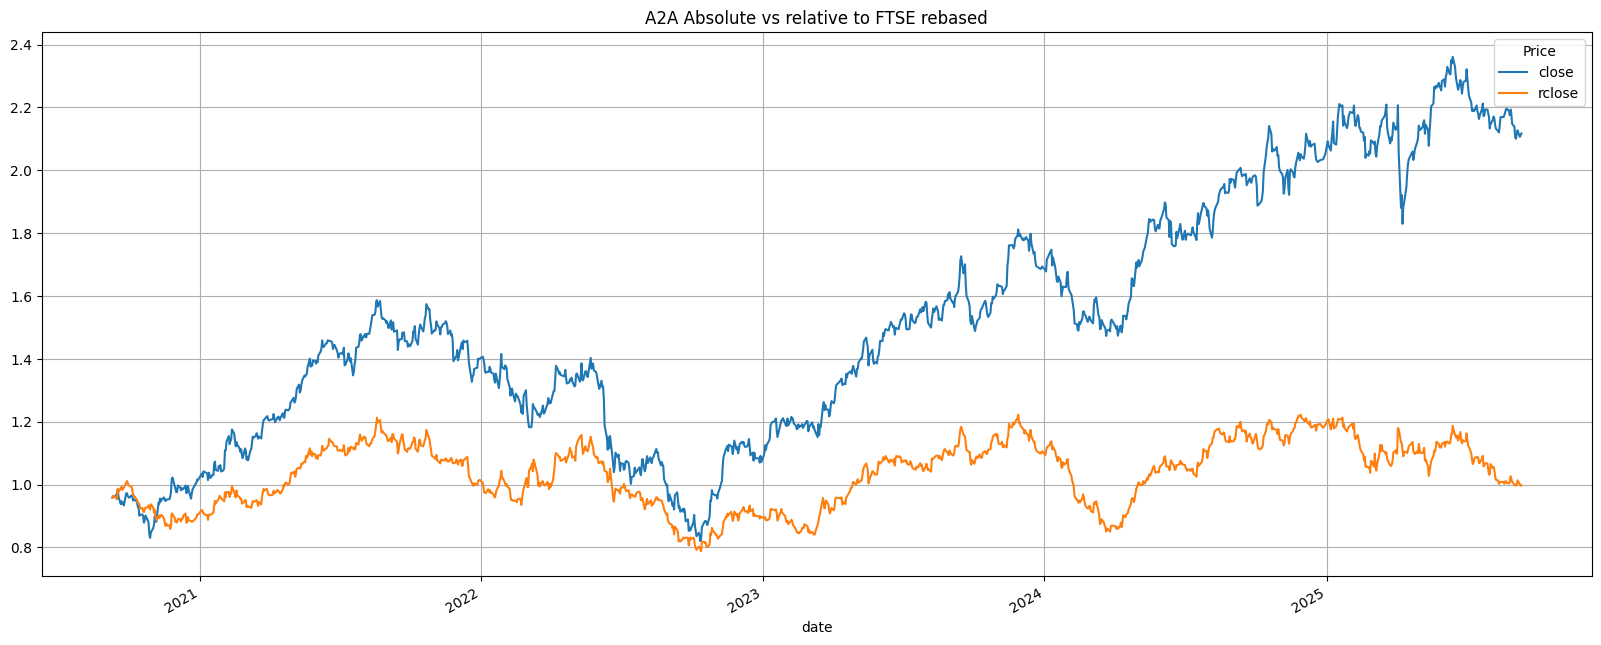

In [20]:
import matplotlib.pyplot as plt
def plot_abs_rel(df, ticker, bm_name):

    df = df.set_index('date')

    plot1 = df[['close','rclose']].plot(figsize=(20,8),grid=True, title= ticker +  ' Absolute vs relative to ' + bm_name + ' rebased' )
    plt.show(plot1)


plot_abs_rel(stock_data, 'A2A', 'FTSE')

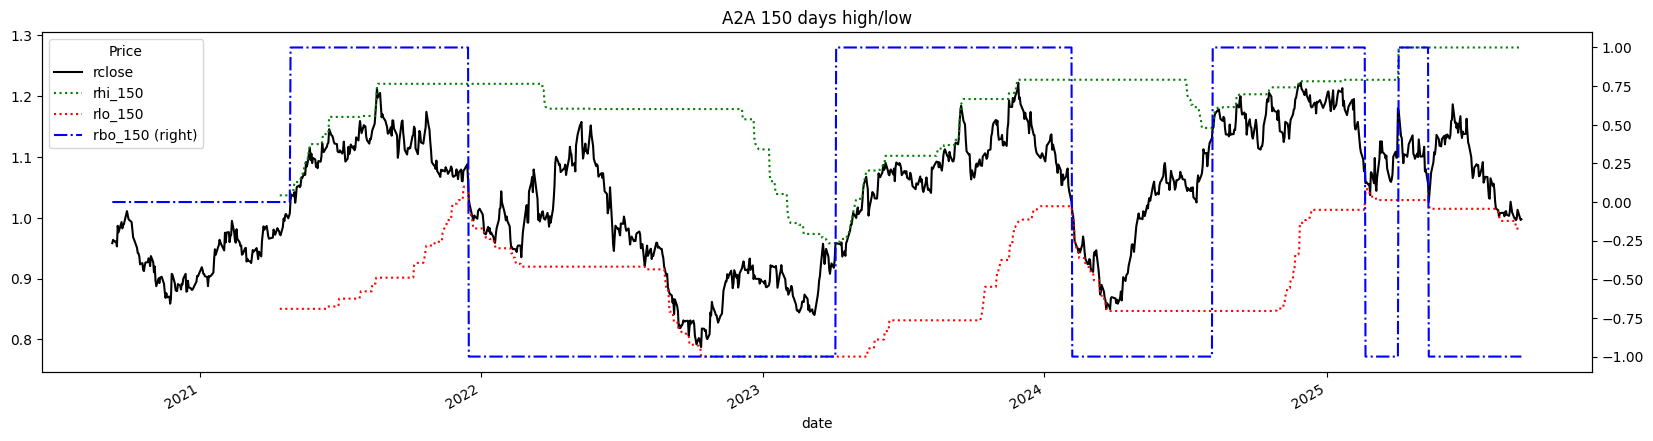

In [21]:
def plot_signal_bo(df, window, ticker, relative):

    # _o,_h,_l,_c = lower_upper_OHLC(df,relative = relative)
    
    prefix_h = 'hi_'
    prefix_l = 'lo_'
    prefix_bo = 'bo_'
    close = 'close'
    if relative:
        prefix_h = 'rhi_'
        prefix_l = 'rlo_'
        prefix_bo = 'rbo_'  
        close = 'rclose'
    df = df.set_index('date')
    df[[close, prefix_h + str(window), prefix_l + str(window), prefix_bo + str(window)]].plot(
        secondary_y= [prefix_bo + str(window)], figsize=(20,5), style=['k','g:','r:','b-.'], 
        title = str.upper(ticker)+' '+str(window) +' days high/low')
    plt.show()

plot_signal_bo(
    stock_data,
    150,
    ticker="A2A",
    relative=True
)

In [ ]:
def plot_signal_tt(df, fast, slow):
    
    rg_cols = ['rtt_'+ str(slow)+str(fast)]
    rg_cols_str = str('rtt_'+ str(slow)+str(fast))
    df = df.set_index('date')
    df[['rclose',rg_cols_str] ].plot(
        secondary_y= rg_cols,figsize=(20,5), style=['k','b-.'], 
        title = str.upper('')+' '+str(rg_cols))
    plt.show()  

plot_signal_tt(
    stock_data,
    20,
    50
)

KeyError: "['rtt_10020'] not in index"

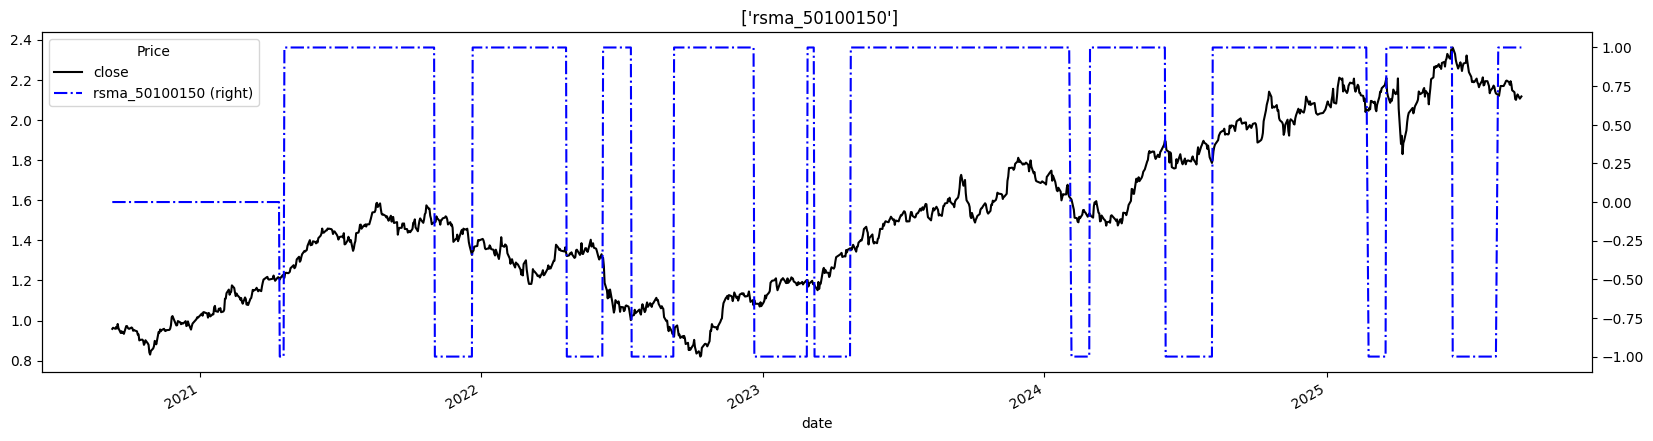

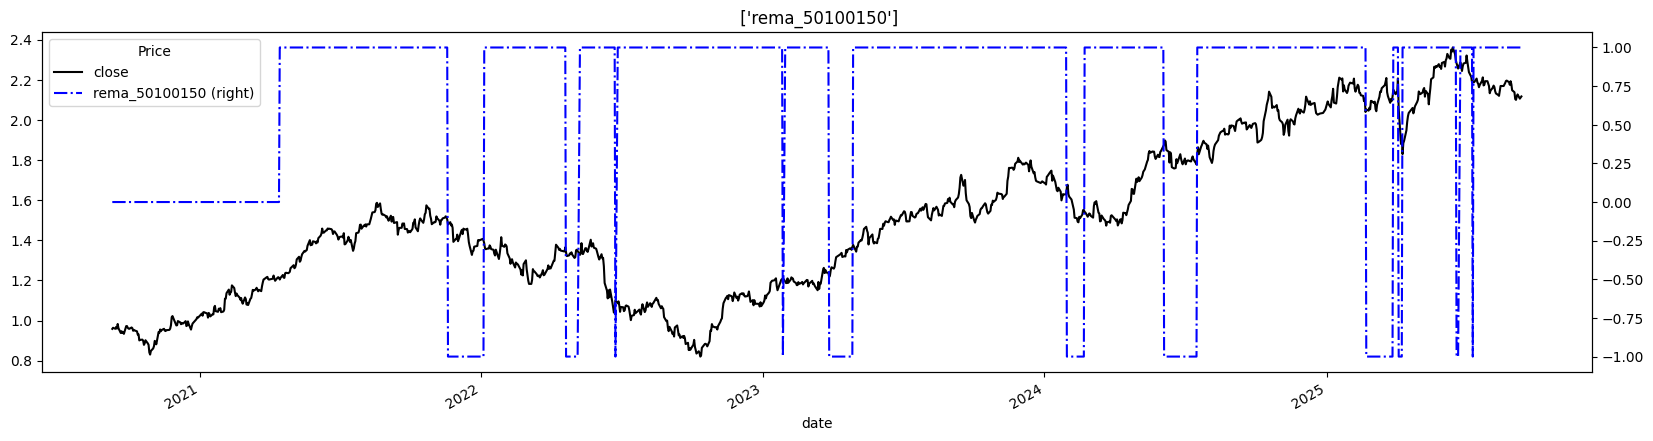

In [46]:
def plot_signal_ma(df, st, mt, lt):

    df = df.set_index('date')

    df[['close','rsma_'+ str(st) + str(mt) + str(lt)] ].plot(
        secondary_y= 'rsma_'+ str(st) + str(mt) + str(lt),figsize=(20,5), style=['k','b-.'], 
        title = str.upper('')+' '+str(['rsma_'+ str(st) + str(mt) + str(lt)]))
    
    df[['close','rema_'+ str(st) + str(mt) + str(lt)] ].plot(
        secondary_y= 'rema_'+ str(st) + str(mt) + str(lt),figsize=(20,5), style=['k','b-.'], 
        title = str.upper('')+' '+str(['rema_'+ str(st) + str(mt) + str(lt)]))
        
    plt.show() 

plot_signal_ma(
    stock_data, 50, 100, 150
)

In [43]:
stock_data.filter(like='1D').columns

Index(['rsma_50100150_chg1D', 'rsma_50100150_chg1D_fx', 'rema_50100150_chg1D',
       'rema_50100150_chg1D_fx', 'rtt_5020_chg1D', 'rtt_5020_chg1D_fx',
       'rbo_150_chg1D', 'rbo_150_chg1D_fx'],
      dtype='object', name='Price')

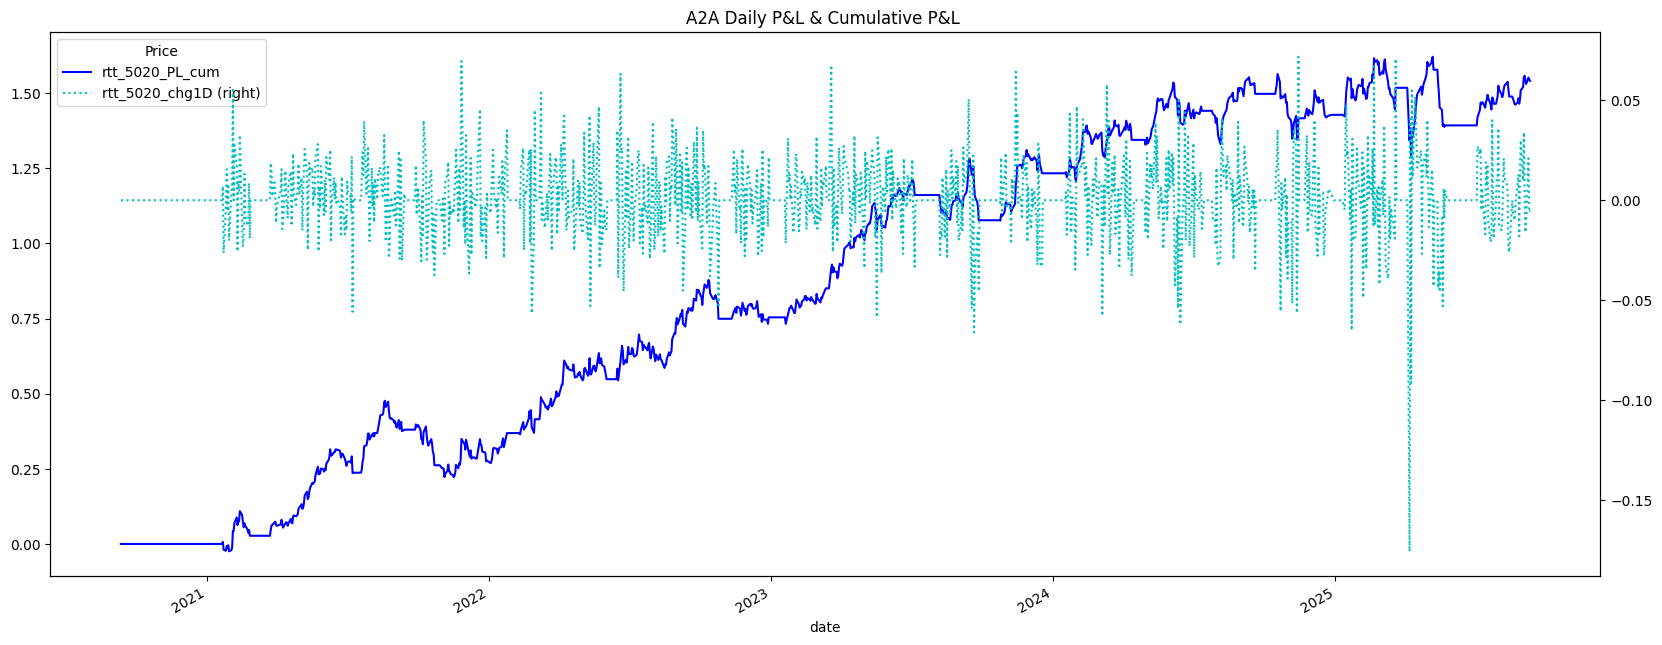

In [47]:
def plot_PL(df, ticker, m):

    df = df.set_index('date')
    
    df[['rtt_5020_PL_cum','rtt_5020_chg1D']].plot(secondary_y=['rtt_5020_chg1D'],figsize=(20,8),style= ['b','c:'],title= str(ticker) +' Daily P&L & Cumulative P&L ' + str(m))
    plt.show()

plot_PL(stock_data, 'A2A', '')

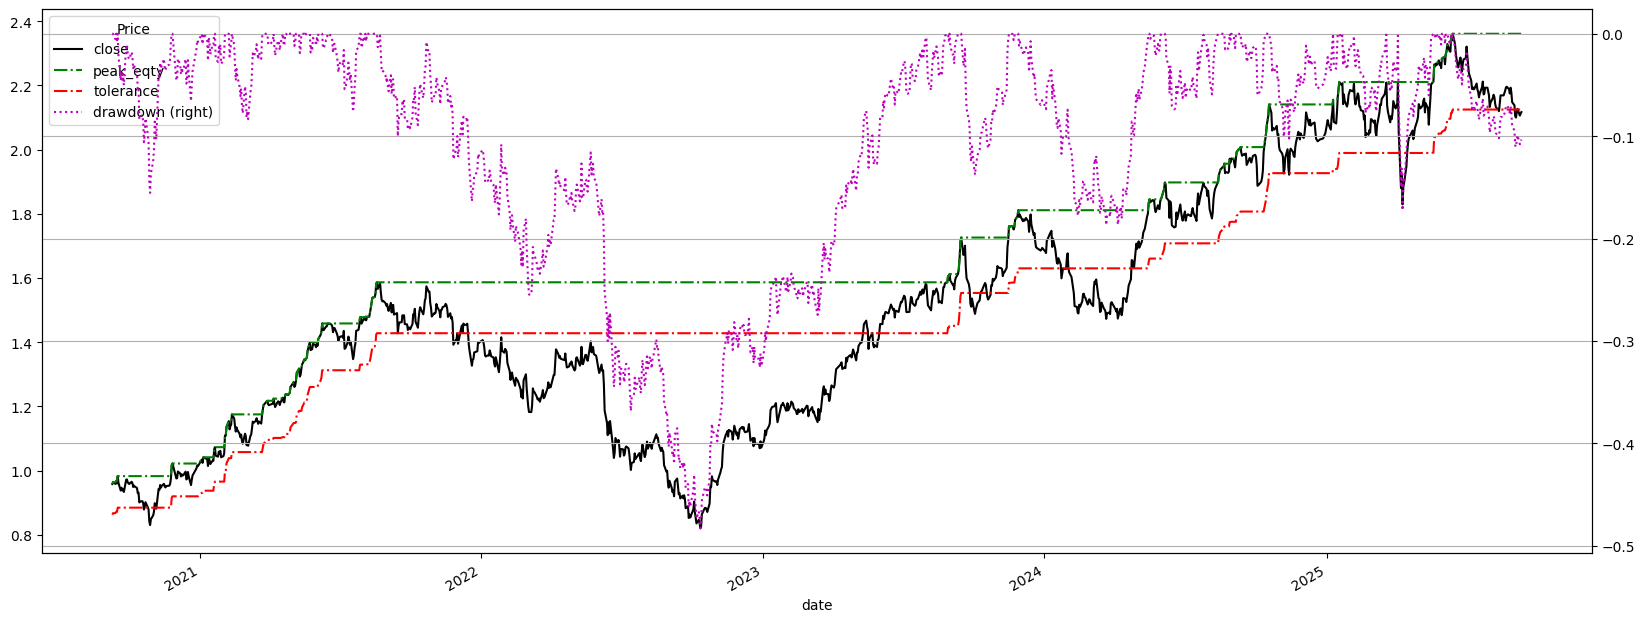

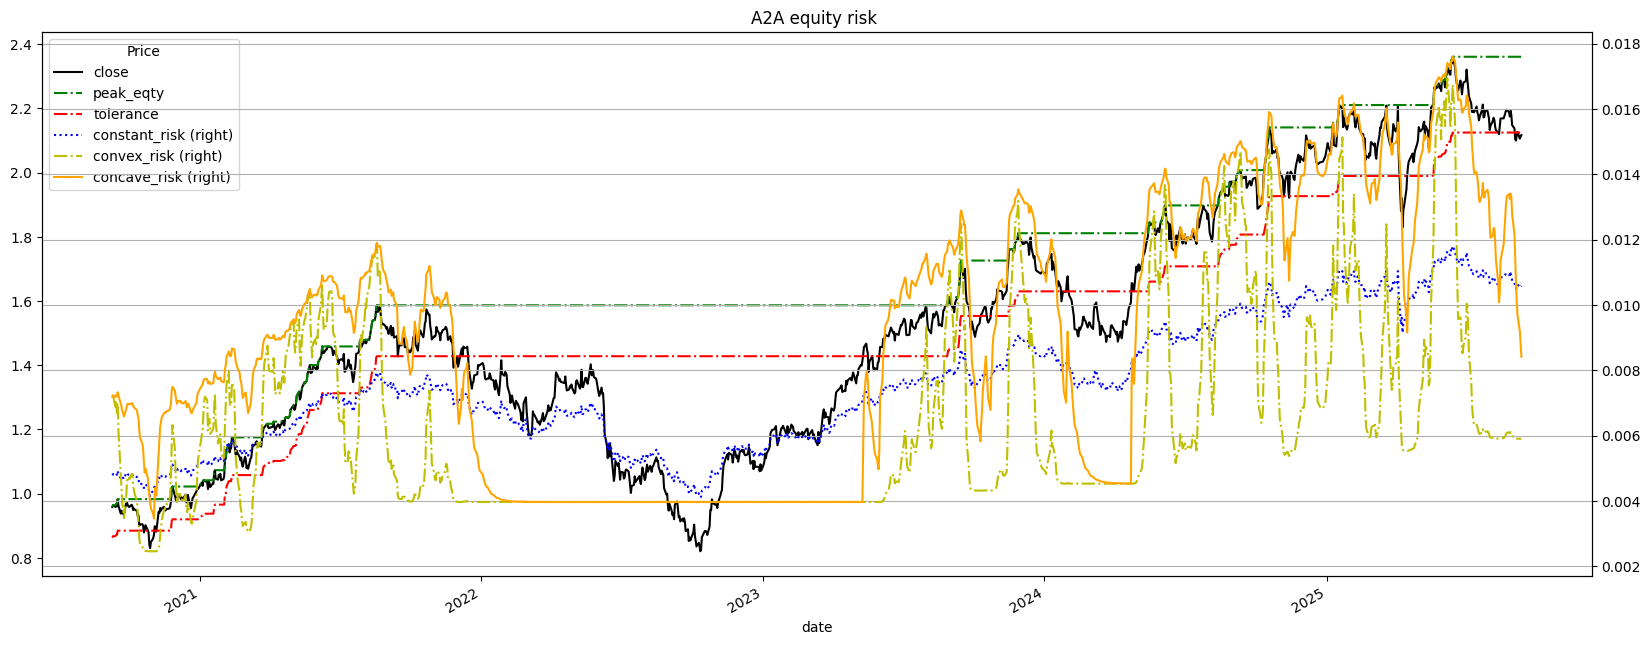

In [50]:
def plot_equity_risk(df, ticker, m):

    df = df.set_index('date')
    
    df[['close','peak_eqty','tolerance', 'drawdown'] ].plot(style = ['k','g-.','r-.','m:'] ,
            secondary_y=['drawdown'], figsize=(20,8),grid=True)
    
    df[['close', 'peak_eqty', 'tolerance',
        'constant_risk','convex_risk','concave_risk']].plot(figsize= (20,8),grid=True,
    secondary_y=['constant_risk','convex_risk','concave_risk'],
    style= ['k','g-.','r-.','b:','y-.', 'orange'], 
    title= str(ticker) + ' equity risk ' + str(m))
    
    plt.show()

plot_equity_risk(
    stock_data,
    'A2A',
    ""
)